In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv("train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [21]:
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
eight = digits.iloc[8, 1:]
eight.shape

(784,)

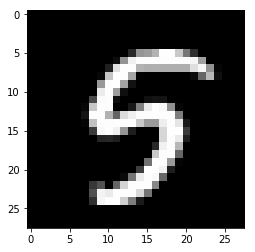

In [25]:
eight = eight.values.reshape(28, 28)
plt.imshow(eight, cmap='gray')

In [6]:
four

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 220, 179,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X = scale(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.05, random_state=101)


C:\Users\vicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
from sklearn import svm
from sklearn import metrics
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
predictions = svm_linear.predict(x_test)


In [11]:
metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

array([[3784,    0,   15,    7,    7,   35,   37,    5,   13,    3],
       [   0, 4368,   16,   31,    6,    1,    3,    7,   19,    3],
       [  80,   58, 3468,   71,   67,   17,   69,   67,   60,   12],
       [  22,   37,  112, 3556,    5,  174,    8,   42,   80,   94],
       [  26,   26,   34,    4, 3542,   12,   45,   32,    6,  158],
       [  49,   35,   33,  232,   29, 3043,   61,   15,   88,   19],
       [  68,   20,   62,   13,   38,   34, 3647,    0,   19,    0],
       [  26,   63,   58,   16,  112,    7,    2, 3729,   19,  143],
       [  38,  130,   90,  106,   20,  172,   42,   29, 3177,   68],
       [  44,   28,   30,   45,  236,   23,    4,  210,   22, 3362]],
      dtype=int64)

In [12]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.8941353383458647

In [13]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
predictions = svm_rbf.predict(x_test)
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9015538847117794


In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10], 
             'gamma': [1e-2, 1e-3]}

svc_grid_search = svm.SVC(kernel="rbf")

clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

clf.fit(x_train, y_train)

C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10], 'gamma': [0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [16]:
clf.best_params_

{'C': 10, 'gamma': 0.001}

In [17]:
clf.best_score_

0.8947619047619048

In [18]:
best_C = 1
best_gamma = 0.001

svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_final.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
predictions = svm_final.predict(x_test)

In [20]:
 confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)

0.9021303258145363 

[[3768    0   14    7    5   25   52    5   30    0]
 [   0 4354   17   25    2   12   21    5   17    1]
 [  33   33 3505   57   45    8  158   49   70   11]
 [  12   28  113 3600    4  104   57   56   93   63]
 [   4   33   42    8 3540   10   74   21   16  137]
 [  24   23   27  199   26 3066  151   17   43   28]
 [  45   15    7    2   17   45 3740    2   28    0]
 [   6   62   37   18   48    7  109 3744   10  134]
 [  22  112   37  116   20  119   67   24 3287   68]
 [  23   28   16   52  128   13   74  258   21 3391]]
